In [1]:
import pandas as pd
import numpy as np

df_resume = pd.read_csv("resume.csv")

In [2]:
df_resume = df_resume.reindex(np.random.permutation(df_resume.index))
df_resume = df_resume.copy().iloc[:1000, ]  #optional if your computer is fast, no need
df_resume.shape

(1000, 4)

In [3]:
import spacy
print(spacy.__version__)

3.5.0


In [4]:
import en_core_web_sm
import spacy

nlp = en_core_web_sm.load()
skill_path = "skills.jsonl"

In [5]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [6]:
doc = nlp("Chaky loves deep learning.")
doc.ents

(Chaky, deep learning)

In [7]:
df_resume.head()

,ID,Resume_str,Resume_html,Category
41,59962788,HR EXECUTIVE Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR
1465,18480859,EXECUTIVE CHEF/ FOOD SERVICE DIRECTOR...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
1288,19053815,MEDIA / ADVERTISING COORDINATOR ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA
914,21868149,PROJECT ASSISTANT Professional ...,"<div class=""fontsize fontface vmargins hmargin...",AGRICULTURE
748,17963031,SYSTEM ADMINISTRATOR/ASSISTANT SUPERV...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE


In [8]:
from spacy.lang.en.stop_words import STOP_WORDS

#before that, let's clean our resume.csv dataframe
def preprocessing(sentence):
    
    stopwords = list(STOP_WORDS)
    doc = nlp(sentence)
    cleaned_tokens = []
    
    for token in doc:
        if token.text not in stopwords and token.pos_ != 'PUNCT' and token.pos_ != 'SPACE' and \
            token.pos_ != 'SYM':
                cleaned_tokens.append(token.lemma_.lower().strip())
                
    return " ".join(cleaned_tokens)

In [9]:
#let's try Chaky, if you feel too dangerous
#random sampling
random_resume = df_resume.Resume_str.iloc[5]
random_resume[:300]

'         GRAPHIC DESIGNER       Summary    A graphic designer, who is creative and detail-oriented; who thinks a lot, but wants to make things clear and simple.\n"Simple without loss of information," is my style. "Pay attention and be accurate to each pixel" is the phrase I will always keep in mind d'

In [10]:
preprocessing(random_resume[:300])

'graphic designer summary a graphic designer creative detail orient think lot want thing clear simple simple loss information style pay attention accurate pixel phrase i mind d'

In [11]:
#let's apply to the whole dataframe
for i, row in df_resume.iterrows():
    clean_text = preprocessing(row.Resume_str)
    df_resume.at[i, 'Clean_resume'] = clean_text

In [12]:
df_resume.head()

,ID,Resume_str,Resume_html,Category,Clean_resume
41,59962788,HR EXECUTIVE Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr executive professional summary forward thin...
1465,18480859,EXECUTIVE CHEF/ FOOD SERVICE DIRECTOR...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,executive chef/ food service director executiv...
1288,19053815,MEDIA / ADVERTISING COORDINATOR ...,"<div class=""fontsize fontface vmargins hmargin...",DIGITAL-MEDIA,media advertising coordinator summary knowledg...
914,21868149,PROJECT ASSISTANT Professional ...,"<div class=""fontsize fontface vmargins hmargin...",AGRICULTURE,project assistant professional overview i aspi...
748,17963031,SYSTEM ADMINISTRATOR/ASSISTANT SUPERV...,"<div class=""fontsize fontface vmargins hmargin...",HEALTHCARE,system administrator assistant supervisor prof...


In [13]:
def get_skills(text):
    #pass the text to the nlp
    doc = nlp(text)  #note that this nlp already know skills
    
    skills = []
    
    #look at the ents
    for ent in doc.ents:
        #if the ent.label_ is SKILL, then we append to some list
        if ent.label_ == "SKILL":
            skills.append(ent.text)
    
    return skills

def unique_skills(x):
    return list(set(x))

In [14]:
df_resume.head(1)

,ID,Resume_str,Resume_html,Category,Clean_resume
41,59962788,HR EXECUTIVE Professional Summa...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr executive professional summary forward thin...


In [15]:
df_resume['Skills'] = df_resume.Clean_resume.apply(get_skills)
df_resume['Skills'] = df_resume.Skills.apply(unique_skills)

In [16]:
df_resume.Skills.iloc[0]

['languages',
 'database',
 'search engines',
 'business',
 'computer science',
 'search engine',
 'design',
 'certificate',
 'visual basic',
 'specification',
 'project management',
 'engineering',
 'business process']

In [17]:
set(df_resume.Category)

{'ACCOUNTANT',
 'ADVOCATE',
 'AGRICULTURE',
 'APPAREL',
 'ARTS',
 'AUTOMOBILE',
 'AVIATION',
 'BANKING',
 'BPO',
 'BUSINESS-DEVELOPMENT',
 'CHEF',
 'CONSTRUCTION',
 'CONSULTANT',
 'DESIGNER',
 'DIGITAL-MEDIA',
 'ENGINEERING',
 'FINANCE',
 'FITNESS',
 'HEALTHCARE',
 'HR',
 'INFORMATION-TECHNOLOGY',
 'PUBLIC-RELATIONS',
 'SALES',
 'TEACHER'}

In [18]:
category = 'INFORMATION-TECHNOLOGY'
cond = df_resume.Category == category

df_resume_it = df_resume[cond]
df_resume_it.shape

(45, 6)

In [19]:
all_skill = np.concatenate(df_resume_it.Skills.values)

In [20]:
#counting
from collections import Counter, OrderedDict

counting = Counter(all_skill)
counting = OrderedDict(counting.most_common(10))

counting

OrderedDict([('support', 43),
             ('software', 39),
             ('design', 36),
             ('business', 33),
             ('security', 31),
             ('server', 27),
             ('windows', 25),
             ('database', 24),
             ('project management', 23),
             ('documentation', 19)])

<BarContainer object of 10 artists>

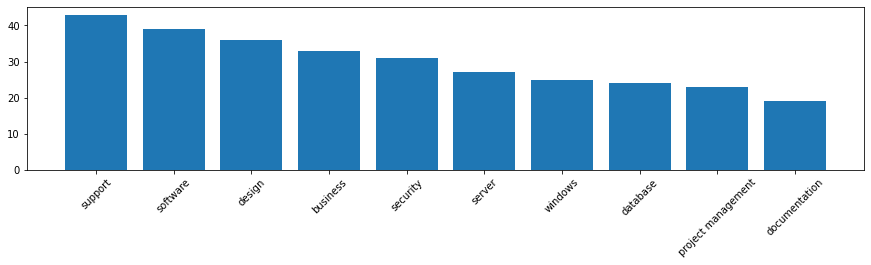

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.xticks(rotation =45)

plt.bar(counting.keys(), counting.values())

In [22]:
from spacy import displacy

text = df_resume_it.Clean_resume.iloc[43]

In [23]:
doc = nlp(text)

In [24]:
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [25]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [26]:
from PyPDF2 import PdfReader
reader = PdfReader("someone_cv.pdf")
page = reader.pages[0] #first page just for demo
text = page.extract_text() 

In [27]:
text = preprocessing(text)

In [28]:
doc = nlp(text)

In [29]:
colors = {"SKILL": "linear-gradient(90deg, #aa9cfc, #fc9ce7)"}
options = {"colors": colors}

displacy.render(doc, style="ent", options=options)

In [30]:
#last thing i go to assignment
#collect all the skill and put it into a list

skills = []

for ent in doc.ents:
    if ent.label_ == 'SKILL':
        skills.append(ent.text)
        
print(set(skills))

{'algorithms', 'artificial intelligence', 'computer science', 'deep learning', 'engineering', 'ai'}


### Let's try to extract degree of education

In [31]:
import en_core_web_sm
import spacy

nlp = en_core_web_sm.load()
skill_path = "skills.jsonl"

In [32]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']